In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image

In [13]:
dfe = pd.read_csv('r490.csv')
dfe = dfe[dfe['r1_charge_heater'] > 0]

In [14]:
global_sol = pd.read_csv("tmp/table2.csv").set_index('optimization target')
global_sol

,optimization mode,process_ron,process_yield,r1_charge_heater,r1_temp,r1_pressure,r2_temp,r2_pressure,ron_loss_perc,yield_loss_perc,ch_increase_ratio
optimization target,,,,,,,,,,,
process_ron,max,83.775327,97.762788,3.379734,138.0,50.0,142.0,70.0,0.000000,0.439978,679.619116
process_yield,max,83.223657,98.194824,0.050600,132.0,90.0,128.0,90.0,0.658512,0.000000,10.175072
r1_charge_heater,min,83.245750,98.183311,0.004973,132.0,60.0,128.0,60.0,0.632140,0.011725,1.000000


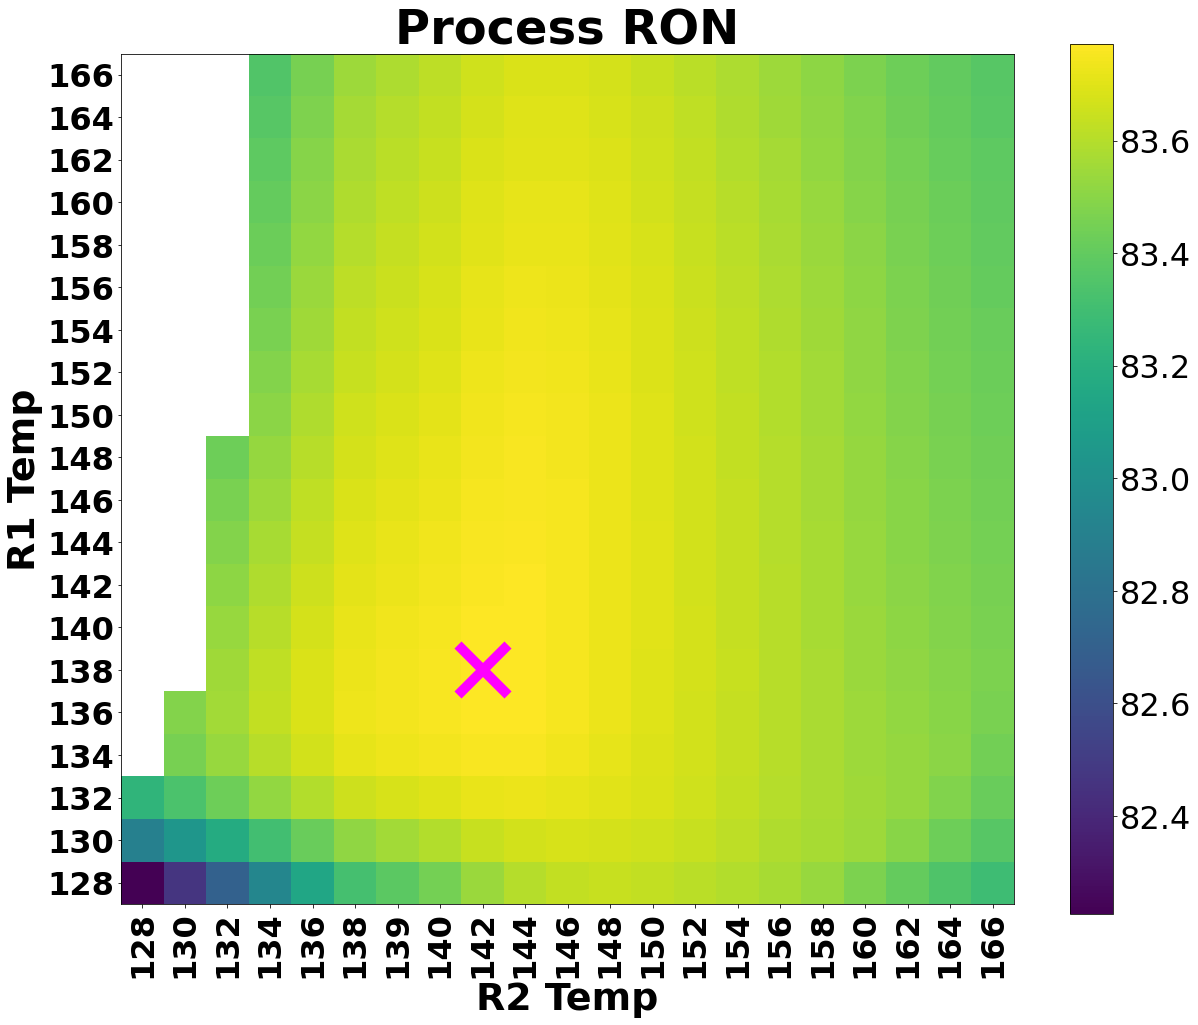

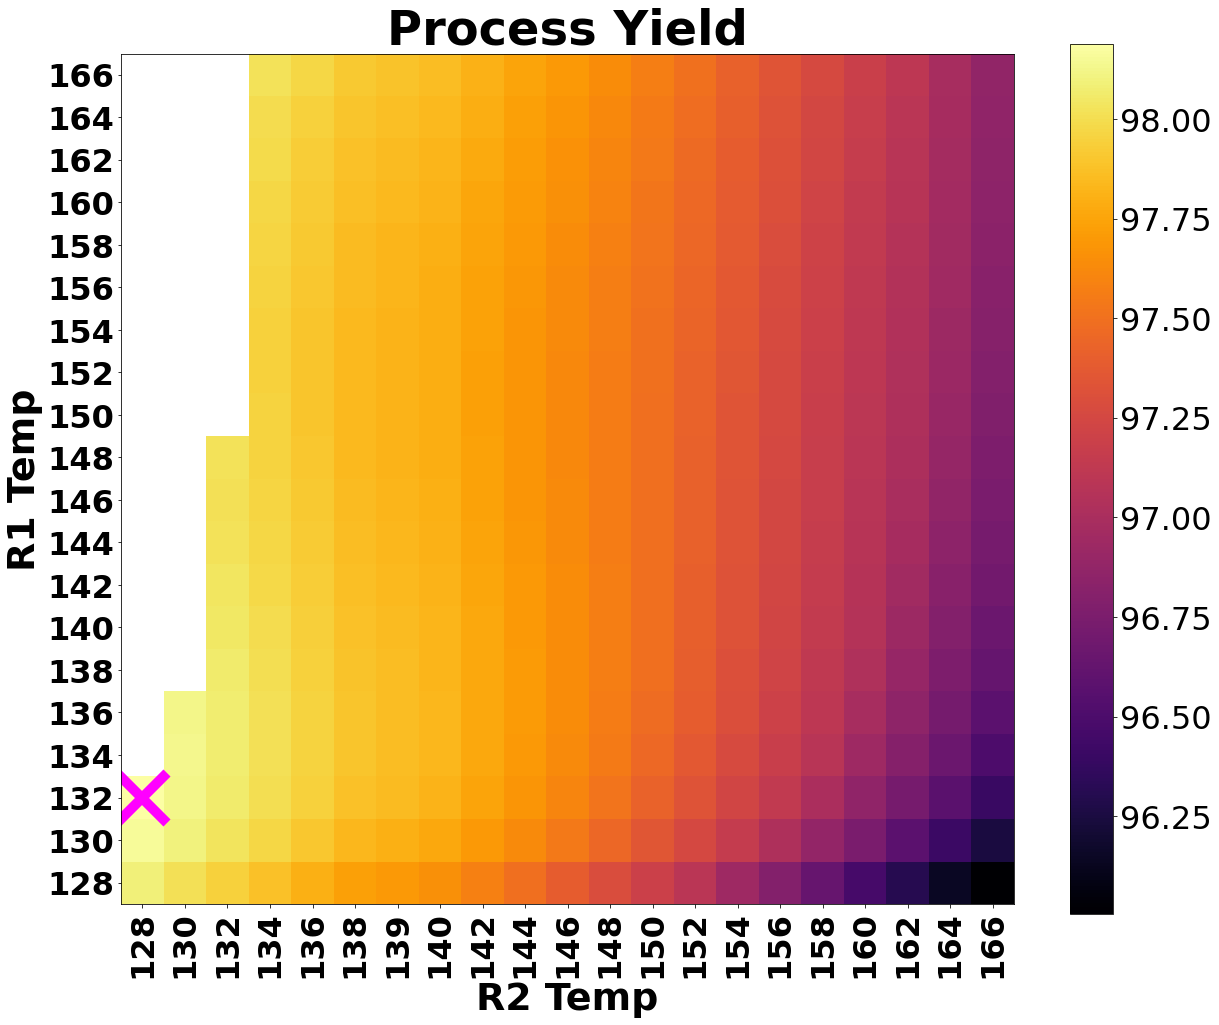

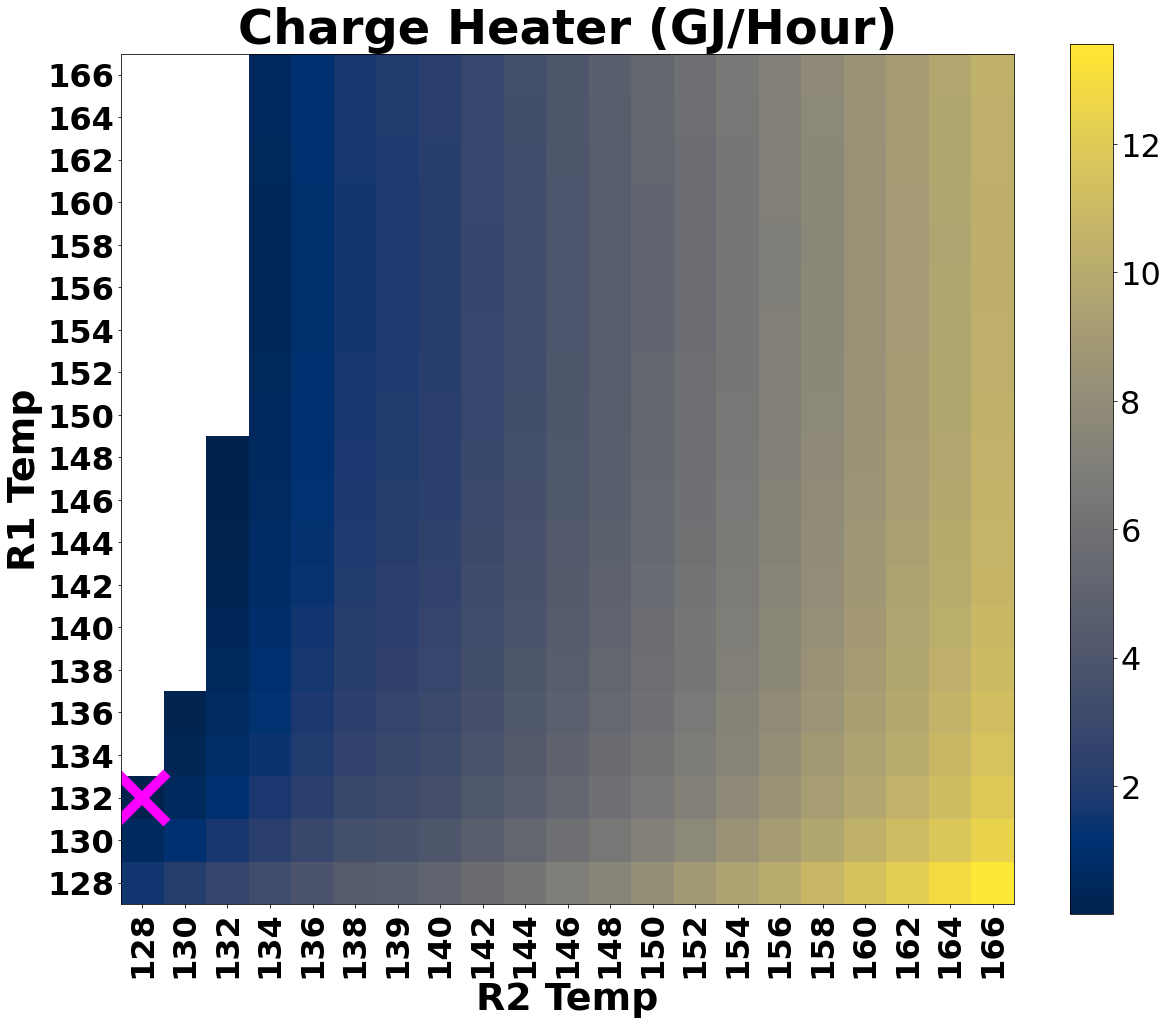

In [16]:
def plot_heatmap(dependent_var, title, cmap, factor = 1):
    r1s = sorted(set(dfe['r1_temp']))
    r2s = sorted(set(dfe['r2_temp']))

    M = np.zeros((len(r1s), len(r2s)))
    for i, r1t in enumerate(r1s):
        for j, r2t in enumerate(r2s):
            if dependent_var == 'r1_charge_heater':
                sdf = dfe[(dfe['r1_temp'] == r1t) & (dfe['r2_temp'] == r2t)& (dfe['r1_charge_heater'] >= 0)]
            else:
                sdf = dfe[(dfe['r1_temp'] == r1t) & (dfe['r2_temp'] == r2t)]
            
            mean_dep = np.mean(sdf[dependent_var])
            M[i, j] = mean_dep

    n,m = M.shape
    M = M * factor 
    
    r1t, r2t = global_sol.loc[dependent_var, 'r1_temp'], global_sol.loc[dependent_var, 'r2_temp']
    mi = r1s.index(r1t)
    mj = r2s.index(r2t)

    f, ax = plt.subplots(1, 1, figsize=(20, 20))
    im = ax.imshow(M, origin='lower', cmap=cmap)
    ax.set_xticks(np.arange(m))
    ax.set_xticklabels(['%d' % d for d in r2s], rotation=90, fontsize=32, fontweight='bold')
    ax.set_yticks(np.arange(n))
    ax.set_yticklabels(['%d' % d for d in r1s], fontsize=32, fontweight='bold')
    ax.set_xlabel('R2 Temp', fontsize=38, fontweight='bold')
    ax.set_ylabel('R1 Temp', fontsize=38, fontweight='bold')
    cbar = f.colorbar(im, ax=ax, shrink=0.8)
    cbar.ax.tick_params(labelsize=32) 
    ax.set_title(title, fontsize=48, fontweight='bold')
    ax.plot(mj, mi, markersize=50, marker='x', color='magenta', markeredgewidth=10)
    plt.savefig("tmp/%s.tiff" % dependent_var, bbox_inches='tight', transparent=True, pad_inches=0, dpi=300, pil_kwargs={"compression": "tiff_lzw"})

plot_heatmap('process_ron', 'Process RON', 'viridis')
plot_heatmap('process_yield', 'Process Yield', 'inferno')
plot_heatmap('r1_charge_heater', 'Charge Heater (GJ/Hour)', 'cividis', factor=1e-6)

In [18]:
im1 = Image.open('tmp/process_ron.tiff')
im2 = Image.open('tmp/process_yield.tiff')
im3 = Image.open('tmp/r1_charge_heater.tiff')

dst = Image.new('RGB', (im1.width + im2.width + im3.width, im1.height))
dst.paste(im1, (0, 0))
dst.paste(im2, (im1.width, 0))
dst.paste(im3, (im1.width + im2.width, 0))

dst.save('tmp/fig6.tiff', compression='tiff_lzw')